In [ ]:
!pip install --upgrade librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [ ]:
import numpy as np
import pandas as pd
import scipy
import librosa

WAV_FILE = '10000_Rock_music.wav'

col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis',
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(6)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(6)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)]

feature_list = []

try:
    y, sr = librosa.load(WAV_FILE, sr=22050)

    feature_list.append(('signal_mean', np.mean(abs(y))))
    feature_list.append(('signal_std', np.std(y)))
    feature_list.append(('signal_skew', scipy.stats.skew(abs(y))))
    feature_list.append(('signal_kurtosis', scipy.stats.kurtosis(y)))

    zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
    feature_list.append(('zcr_mean', np.mean(zcr)))
    feature_list.append(('zcr_std', np.std(zcr)))

    rmse = librosa.feature.rms(y=y + 0.0001)[0]
    feature_list.append(('rmse_mean', np.mean(rmse)))
    feature_list.append(('rmse_std', np.std(rmse)))

    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    feature_list.append(('spectral_centroid_mean', np.mean(spectral_centroids)))
    feature_list.append(('spectral_centroid_std', np.std(spectral_centroids)))

    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=2)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=4)[0]
    feature_list.append(('spectral_bandwidth_2_mean', np.mean(spectral_bandwidth_2)))
    feature_list.append(('spectral_bandwidth_2_std', np.std(spectral_bandwidth_2)))
    feature_list.append(('spectral_bandwidth_3_mean', np.mean(spectral_bandwidth_3)))
    feature_list.append(('spectral_bandwidth_3_std', np.std(spectral_bandwidth_3)))
    feature_list.append(('spectral_bandwidth_4_mean', np.mean(spectral_bandwidth_4)))
    feature_list.append(('spectral_bandwidth_4_std', np.std(spectral_bandwidth_4)))

    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=100.0)
    for i in range(6):
        feature_list.append(('spectral_contrast_' + str(i+1) + '_mean', np.mean(spectral_contrast[i])))
        feature_list.append(('spectral_contrast_' + str(i+1) + '_std', np.std(spectral_contrast[i])))

    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)[0]
    feature_list.append(('spectral_rolloff_mean', np.mean(spectral_rolloff)))
    feature_list.append(('spectral_rolloff_std', np.std(spectral_rolloff)))

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        feature_list.append(('mfccs_' + str(i+1) + '_mean', np.mean(mfccs[i])))
        feature_list.append(('mfccs_' + str(i+1) + '_std', np.std(mfccs[i])))

    feature_string = ','.join([f"{name}:{value}" for name, value in feature_list])

except Exception as e:
    feature_string = f"Error processing {WAV_FILE}: {e}"

print(feature_string)


signal_mean:0.29139307141304016,signal_std:0.35188063979148865,signal_skew:0.5672548585429009,signal_kurtosis:-0.6584986991585082,zcr_mean:0.13085373664838337,zcr_std:0.10664469997949362,rmse_mean:0.34914061427116394,rmse_std:0.038537248969078064,spectral_centroid_mean:2651.7909257150727,spectral_centroid_std:1045.44149979986,spectral_bandwidth_2_mean:2548.4554149222263,spectral_bandwidth_2_std:364.07506137589394,spectral_bandwidth_3_mean:2987.07948104732,spectral_bandwidth_3_std:232.75635848140888,spectral_bandwidth_4_mean:3390.562765681047,spectral_bandwidth_4_std:147.56699567166353,spectral_contrast_1_mean:19.06778647123685,spectral_contrast_1_std:4.987048142911586,spectral_contrast_2_mean:12.408357590122517,spectral_contrast_2_std:3.160720705985416,spectral_contrast_3_mean:15.914526128979187,spectral_contrast_3_std:3.650873769586032,spectral_contrast_4_mean:17.65232020263605,spectral_contrast_4_std:4.001739164741082,spectral_contrast_5_mean:15.219530861406259,spectral_contrast_5_st

In [ ]:
import numpy as np
import librosa

def check_healthiness(feature_values):
    thresholds = {
        'signal_mean': 0.2,
        'signal_std': 0.2,
        'zcr_mean': 0.1,
        'zcr_std': 0.1,
        'spectral_centroid_mean': 2000,
        'spectral_centroid_std': 1000,
        'spectral_bandwidth_2_mean': 2000,
        'spectral_bandwidth_2_std': 1000,
        'spectral_contrast_1_mean': 10,
        'spectral_contrast_1_std': 5,
        'spectral_rolloff_mean': 5000,
        'spectral_rolloff_std': 2000,
        'mfccs_1_mean': 10,
        'mfccs_1_std': 5,
    }

    is_healthy = True

    for feature_name, threshold in thresholds.items():
        if feature_name in feature_values:
            if feature_values[feature_name] < threshold:
                is_healthy = False
                break
    return is_healthy

WAV_FILE = '10000_Rock_music.wav'

def extract_audio_features(audio_file):
    feature_values = {}

    try:
        y, sr = librosa.load(audio_file, sr=22050)

        feature_values['signal_mean'] = np.mean(abs(y))
        feature_values['signal_std'] = np.std(y)

        feature_values['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512))
        feature_values['zcr_std'] = np.std(librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512))

        feature_values['spectral_centroid_mean'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        feature_values['spectral_centroid_std'] = np.std(librosa.feature.spectral_centroid(y=y, sr=sr))

        feature_values['spectral_bandwidth_2_mean'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr, p=2))
        feature_values['spectral_bandwidth_2_std'] = np.std(librosa.feature.spectral_bandwidth(y=y, sr=sr, p=2))

        feature_values['spectral_contrast_1_mean'] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=100.0))
        feature_values['spectral_contrast_1_std'] = np.std(librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=100.0))

        feature_values['spectral_rolloff_mean'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85))
        feature_values['spectral_rolloff_std'] = np.std(librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85))

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):
            feature_values[f'mfccs_{i}_mean'] = np.mean(mfccs[i-1])
            feature_values[f'mfccs_{i}_std'] = np.std(mfccs[i-1])

    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

    return feature_values

audio_features = extract_audio_features(WAV_FILE)

if check_healthiness(audio_features):
    print("Suara terdengar sehat.")
else:
    print("Suara terdengar tidak sehat.")


Suara terdengar tidak sehat.


In [ ]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

y, sr = librosa.load('10000_Rock_music.wav', sr = 22050)

In [ ]:
Audio(y, rate=sr)

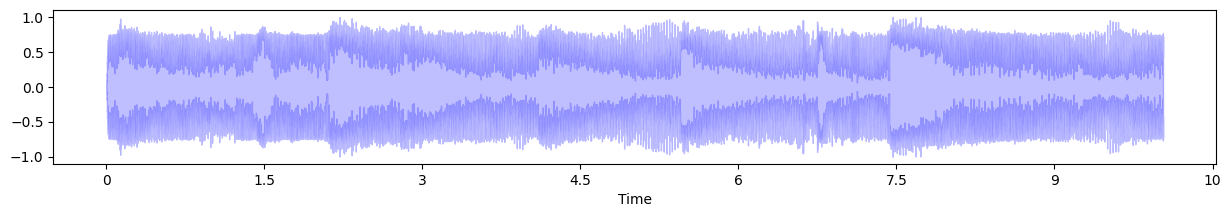

In [ ]:
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr,
                     alpha  = 0.25,
                     color  = 'blue')

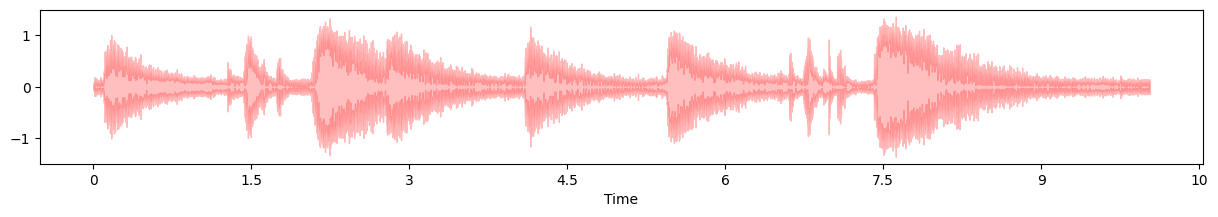

In [ ]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr,
                     alpha  = 0.25,
                     color  = 'red')

FT Shape (1025, 433)


Text(0.5, 1.0, 'Linear Amplitude')

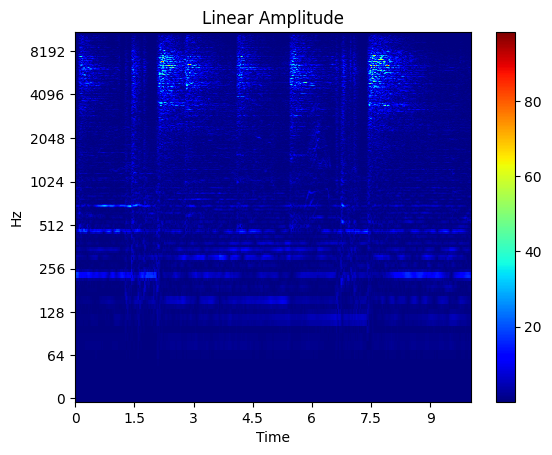

In [ ]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Linear Amplitude')

<ipython-input-10-b7d1e9029704>:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_amplitude = librosa.amplitude_to_db(D, ref=np.max)


Text(0.5, 1.0, 'Log Amplitude')

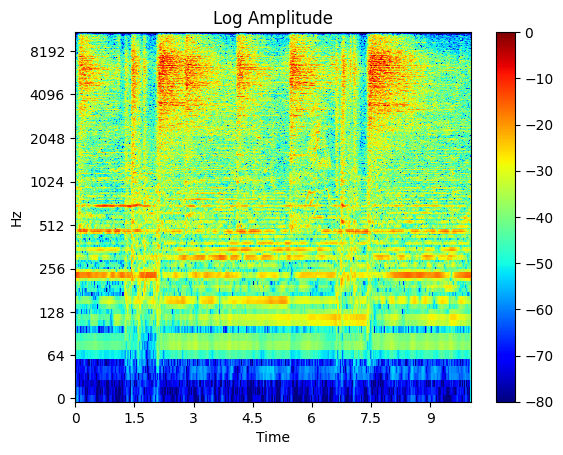

In [ ]:
log_amplitude = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

<ipython-input-11-f26d768c1b28>:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log


Text(0.5, 1.0, 'Log Power')

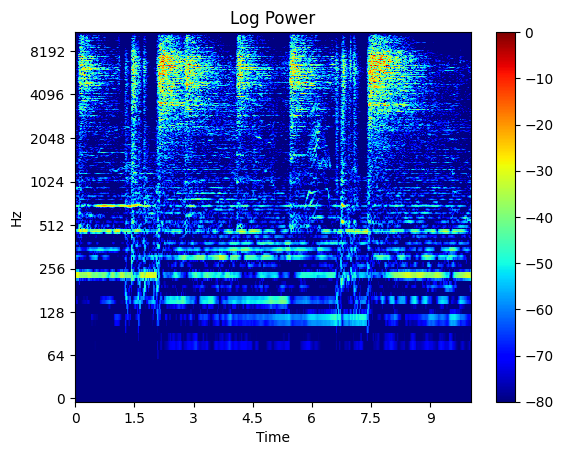

In [ ]:
log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')

Transform shape (84, 433)


<ipython-input-13-dc70ff605914>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_power = librosa.amplitude_to_db(C**2, ref=np.max)


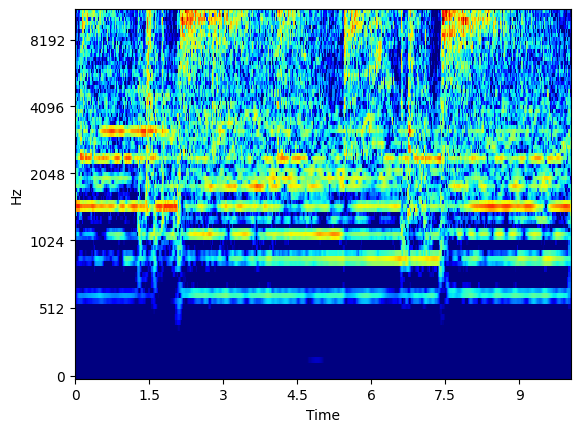

In [ ]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape)
log_power = librosa.amplitude_to_db(C**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)

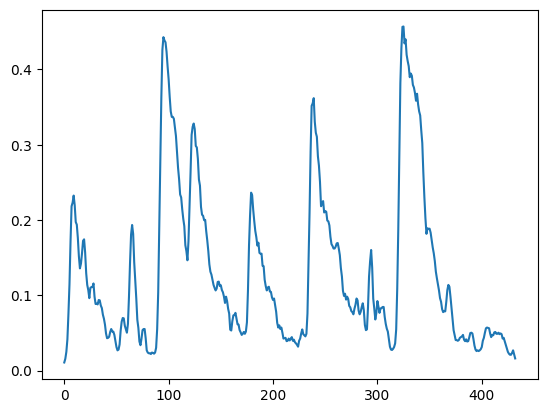

In [ ]:
y, sr = librosa.load(WAV_FILE, sr=22050)
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.plot(zcr)